<a href="https://colab.research.google.com/github/gkarthick510/Akaike-assignment/blob/main/TechnoHacks_task__Titanic%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [443]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [444]:
test=pd.read_csv("/content/test(2).csv")
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [445]:
train=pd.read_csv("/content/train(1).csv")
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [446]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [447]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [448]:
test.shape

(418, 11)

In [449]:
train.shape

(891, 12)

In [450]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [451]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [454]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [452]:
train.duplicated().any()

False

In [453]:
test.duplicated().any()

False

In [455]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [456]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [457]:
test['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [458]:
test['Age'].value_counts()

21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: Age, Length: 79, dtype: int64

In [459]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [460]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [499]:
train['Fare'].mode()

0    8.05
Name: Fare, dtype: float64

In [498]:
train['Fare'].median()

14.4542

In [497]:
train['Fare'].mean()

32.204207968574636

In [461]:
train['PassengerId'].count()

891

In [500]:
train['Age'].mean()

29.69911764705882

In [503]:
train['Age'].mode()

0    24.0
Name: Age, dtype: float64

In [462]:
train.groupby(['Sex','Survived']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Survived                                                               
female 0                  81      81    81   64     81     81      81    81   
       1                 233     233   233  197    233    233     233   233   
male   0                 468     468   468  360    468    468     468   468   
       1                 109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Sex    Survived                   
female 0             6        81  
       1            91       231  
male   0            62       468  
       1            45       109

In [463]:
train.groupby(['Survived','Sex','Fare']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  \
Survived Sex    Fare                                                     
0        female 6.7500              1       1     1    1      1      1   
                7.5500              1       1     1    0      1      1   
                7.6292              1       1     1    0      1      1   
                7.7500              5       5     5    3      5      5   
                7.7750              2       2     2    2      2      2   
...                               ...     ...   ...  ...    ...    ...   
1        male   110.8833            1       1     1    1      1      1   
                120.0000            2       2     2    2      2      2   
                133.6500            1       1     1    1      1      1   
                151.5500            1       1     1    1      1      1   
                512.3292            2       2     2    2      2      2   

                          Ticket  Cabin  Embarked  
Survived Sex    Fare                               
0        female 6.7500         1      0         1  
                7.5500         1      0         1  
                7.6292         1      0         1  
                7.7500         5      0         5  
                7.7750         2      0         2  
...                          ...    ...       ...  
1        male   110.8833       1      1         1  
                120.0000       2      2         2  
                133.6500       1      0         1  
                151.5500       1      1         1  
                512.3292       2      2         2  

[402 rows x 9 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

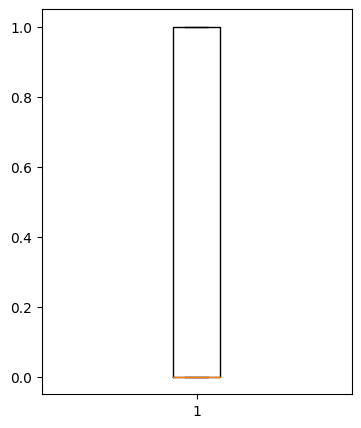

In [464]:
plt.figure(figsize=(4,5))
plt.boxplot(data=train,x='Survived')
plt.show

In [465]:
train['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [466]:
train['Survived'].dtype

dtype('int64')

In [467]:
CabinNo_train = train.Cabin.str[0]
train['Cabin'] = CabinNo_train
train['Cabin'].fillna('no cabin', inplace=True)

CabinNo_test = test.Cabin.str[0]
test['Cabin'] = CabinNo_test
train['Cabin'].fillna('no cabin', inplace=True)

In [468]:
train['Cabin'].value_counts()

no cabin    687
C            59
B            47
D            33
E            32
A            15
F            13
G             4
T             1
Name: Cabin, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

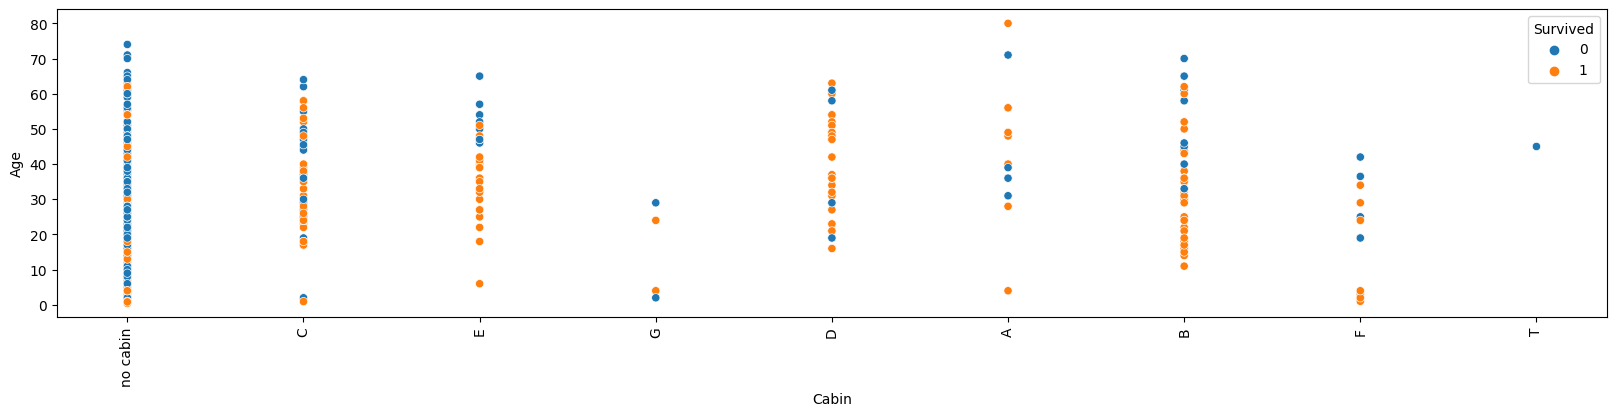

In [469]:
plt.figure(figsize=(20,4))
sns.scatterplot(data=train,y='Age',hue='Survived',x='Cabin')
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

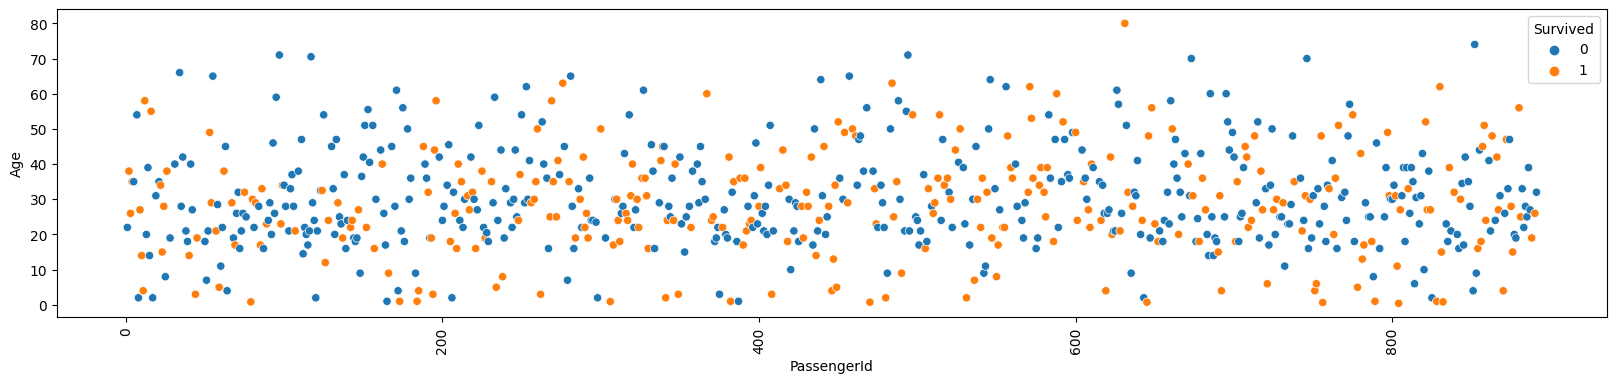

In [470]:
plt.figure(figsize=(20,4))
sns.scatterplot(data=train,x='PassengerId',y='Age',hue='Survived')
plt.xticks(rotation=90)
plt.show

In [471]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<Axes: xlabel='Cabin', ylabel='Fare'>

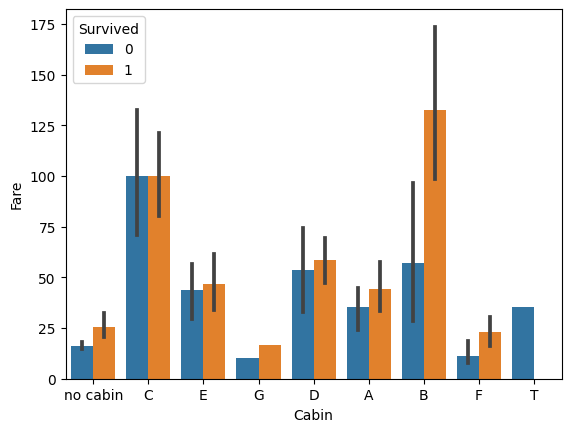

In [472]:
sns.barplot(data=train,x='Cabin',y='Fare',hue='Survived')

<Axes: xlabel='Fare', ylabel='Cabin'>

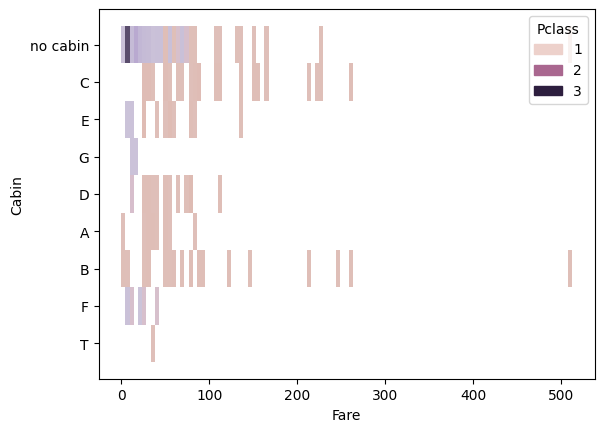

In [507]:
sns.histplot(data=train,x='Fare',y='Cabin',hue='Pclass')

In [473]:
# female have mostly survived
pd.crosstab(train.Sex, train.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


In [474]:
# feature SibSp (siblings and spouse) and Parch (parents and children) can be combined
# creating new feature
train['Relatives']=train.SibSp + train.Parch
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,no cabin,S,1


Text(0.5, 1.0, 'Relationship between relatives and survived')

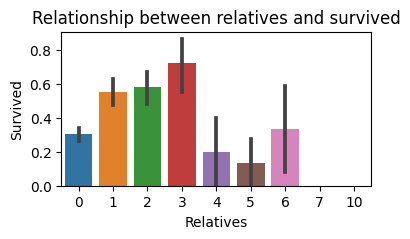

In [475]:
plt.figure(figsize=(4,2))
sns.barplot(y='Survived',x='Relatives',data=train)
plt.title('Relationship between relatives and survived')

In [476]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import make_column_selector as selector
np.random.seed(7)

# drop unimportant features for modeling
X=train.drop(['PassengerId','Name','Survived','Ticket','SibSp','Parch'], axis=1)

# seperating target value
y=train.Survived

In [477]:
X

,Pclass,Sex,Age,Fare,Cabin,Embarked,Relatives
0,3,male,22.0,7.2500,no cabin,S,1
1,1,female,38.0,71.2833,C,C,1
2,3,female,26.0,7.9250,no cabin,S,0
3,1,female,35.0,53.1000,C,S,1
4,3,male,35.0,8.0500,no cabin,S,0
...,...,...,...,...,...,...,...
886,2,male,27.0,13.0000,no cabin,S,0
887,1,female,19.0,30.0000,B,S,0
888,3,female,NaN,23.4500,no cabin,S,3
889,1,male,26.0,30.0000,C,C,0


In [478]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [479]:
num_col=['Pclass','Age','Relatives','Fare']
cat_col1=['Sex','Embarked']
cat_col2=['Cabin']
# cabin can be imputed as any string

# defining transformer for num values
num_transf=SimpleImputer()

# defining transformer for cat_col1
cat_transf1=Pipeline(steps=[
    ('imp',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore')),
])
# defining transformer for cat_col2
cat_transf2=Pipeline(steps=[
    ('imp',SimpleImputer(strategy='constant', fill_value='no cabin')),
    ('onehot',OneHotEncoder(handle_unknown='ignore')),
])
# defining preprocessor

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transf, num_col),
        ('cat1', cat_transf1, cat_col1),
    ('cat2', cat_transf2, cat_col2)
    ])

In [480]:
model=RandomForestClassifier()
my_pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',model)
])

my_pipeline.fit(X_train,y_train)

preds = my_pipeline.predict(X_valid)

my_pipeline.score(X_valid,y_valid)

0.8212290502793296

In [481]:
test['Relatives']=test.SibSp + test.Parch

In [482]:
test.drop(['PassengerId','Name','Ticket','SibSp','Parch'],axis=1, inplace=True)

In [491]:
test

,Pclass,Sex,Age,Fare,Cabin,Embarked,Relatives,CabinNO
0,3,male,34.5,7.8292,no cabin,Q,0,NaN
1,3,female,47.0,7.0000,no cabin,S,1,NaN
2,2,male,62.0,9.6875,no cabin,Q,0,NaN
3,3,male,27.0,8.6625,no cabin,S,0,NaN
4,3,female,22.0,12.2875,no cabin,S,2,NaN
...,...,...,...,...,...,...,...,...
413,3,male,NaN,8.0500,no cabin,S,0,NaN
414,1,female,39.0,108.9000,C,C,0,C
415,3,male,38.5,7.2500,no cabin,S,0,NaN
416,3,male,NaN,8.0500,no cabin,S,0,NaN


In [490]:

CabinNo_test = test.Cabin.str[0]
test['Cabin'] = CabinNo_test
test['Cabin'].fillna('no cabin', inplace=True)

In [484]:
my_pipeline.fit(X_train,y_train)
pred=my_pipeline.predict(test)

In [485]:
test.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked', 'Relatives'], dtype='object')

In [486]:
test_data = pd.read_csv('/content/test(2).csv')
output = pd.DataFrame({'PassengerId': test_data.PassengerId,
                       'Survived': pred})
output.to_csv('submission.csv', index=False)

In [492]:
s=pd.read_csv('/content/submission.csv')
s

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
